#### Introduction to FITS images and image math
___________________________________________________________________________

This is a short exercise that should help acquaint you with the basics of dealing with data in Astropy.

## ds9 

First, change directories to where you have stored the two images you'll be working with and the open a ds9 window from the command line (not inside this notebook).

      ds9 &

(The "&" allows you to launch these other windows and get the command prompt back on the current window.)

Use File -> Open to load im010.fits. Take a moment to acquaint yourself with ds9, if you have not used it before. 

You should know how to zoom, pan, window, and blink.  All options are done with the mouse. Notice the pull down menus at the top of the window on the left side.  Pull each menu down and review the selections - use the left mouse button to pull down the menus.

Note the Physical and Image boxes at the top of the window showing the X,Y position of the cursor in the image frame.

At the top of the image display portion of the window, there are some buttons. The top row are menu level and the bottom row are options under each menu.

The box in the upper right corner is a "panner" box - it shows you what part of the image you are currently looking at. Choose the "zoom" menu button and investigate the zoom options.

You can adjust contrast and brightness by holding the right mouse button down on the image and moving the mouse left/right and up/down. Try it. Can you flip the brightness scale to get dark stars on a white background?

We want to blink this field and that of im011.  So we will need to load the second image into the second frame buffer - you have 4 frame buffers available for images.

Select the frame button and then first. Now select next. Note how this toggles between the two frames (see the File field at the top of the window.) Now select blink and you will see the two frames switch back and forth. Do you see the small shift in position between the two frames

Selecting single will end the blinking.

Play a bit with ds9 until you feel comfortable with it. It has many more features.

Now back to our original problem of computing and correcting for these shifts. 
Pick 3 stars visible in both frames and measure their x,y pixel values using ds9. 

**QUESTION:**<br>
Enter those coordinates here:


             im010         im011<br>
star 1<br>  (184.39,189.254) (184.390, 191.375)

star 2<br>  (191.812,82.213) (192.873,85.333)

star 3<br>  (63.502,18.527)   (63.502, 20.648) 

**QUESTION:**<br>
Now compute and report your average shifts of im011 from im010 in both coordinates:<br>
X <br> -.531
Y <br> -2.47

## Python

Our next task is to apply the shift to im011. 

For that, we'll use the Numerical Python (numpy) package within Scientific python (Scipy), in the steps outlined below.
We'll also use the matplotlib package to display data within the notebook (rather than with ds9) and we'll make use of the Astropy package for FITS file input/output.<br>

https://docs.scipy.org


In [39]:
#initial imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage   #submodule for image processing

# change some default plotting parameters
import matplotlib as mpl
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['image.cmap'] = 'Greys_r'

# run the %matplotlib magic command to enable inline plotting
# in the current Notebook
%matplotlib inline

## Handling FITS files
astropy.io.fits  http://docs.astropy.org/en/stable/io/fits/index.html 

We'll see more about this in future tutorials


In [44]:
#import astropy fits file handling package and read data array from fits file
from astropy.io import fits
img11 = 'data/im011.fits'
img11_hdulist = fits.open(img11)
img11_data = img11_hdulist[0].data.astype(np.float)

In [45]:
#shift the data array-- substitute YOUR average xshift & yshift for 10,10 below
from scipy import misc   #submodule for geometrical transformations
shifted_img11 = ndimage.shift(img11_data, (-0.353667,-2.12067))

In [47]:
#write to a new fits file
hdu = fits.PrimaryHDU(shifted_img11)
hdu.writeto('data/s011.fits')   #astropy function to write to fits file

<br>
**QUESTION:** In what directory was your new fits file created? Why?

Load this newly created fits file into a new frame in ds9. You should now have im010.fits in one frame and s011.fits in another. Now, use the blink function under the frame menu to blink between the two frames and convince yourself they are well-aligned. If they are not, reexamine the shift you applied to im011.fits

## Image math
Our next step will be to combine im010.fits and s011.fits, the version of im011.fits that has been shifted to align with im010.fits. We will average the two frames. 

Once we have them both in the form of arrays, we can use simple array math on them. First, we have to read in im010.fits


In [49]:
img10 = 'data/im010.fits'
img10_hdulist = fits.open(img10)
img10_data = img10_hdulist[0].data.astype(np.float)

In [50]:
#compute average of im010 and s011
im_avg= (img10_data + shifted_img11)/2.
hdu=fits.PrimaryHDU(im_avg)
hdu.writeto('data/avg.fits')

<br>
_**Optional practice:**_<br>
Try writing out this new average file into a FITS file as you did for s011 above. <br>
You may add new cells to this interactive notebook if you like. <br>
Display the fits file in ds9.
<br>


## Creating an inline plot

Now, let's create an inline view of this image, i.e. internal to this notebook.<br>


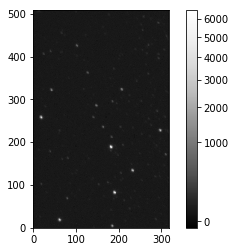

In [51]:
# display the data file 
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)
norm = ImageNormalize(im_avg, interval=MinMaxInterval(),stretch=SqrtStretch())
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(im_avg, origin='lower', norm=norm)
fig.colorbar(im)
#plt.imshow(data, scale='sqrt', percent=99.5)

## Image statistics
Now let's look at some statistics for this new, summed image.

In [52]:
#mean pixel value
np.mean(im_avg)

46.47749369523652

In [53]:
#standard deviation
np.std(im_avg)

79.77194845941378

In [54]:
#median
np.median(im_avg)

42.30323101132343

<br>
**Question:** 
Add cells in this notebook to take a difference of the two data arrays representing im010 and the shifted im011.<br>
Create an inline plot of that difference array and calculate the image statistics as above.

In [55]:
diffImg=shifted_img11-img10_data

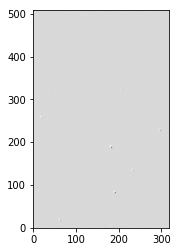

In [56]:
fig.colorbar(plt.figure().add_subplot(1,1,1).imshow(diffImg,origin='lower',norm=ImageNormalize(diffImg,interval=MinMaxInterval(),stretch=SqrtStretch())))

In [57]:
np.mean(diffImg)


-0.7268390617120984

In [58]:
np.std(diffImg)

80.1084404691104

In [59]:
np.median(diffImg)

-0.2273501717748907